<a href="https://colab.research.google.com/github/mohit809/Spam_Email_Classification_using_NLP_and_Machine_Learning/blob/main/Spam_Email_Classification_using_NLP_and_Machine_Learning_(P3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install wordcloud
!pip install TextBlob
!pip install nltk
!pip install emoji
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 6.7 MB/s eta 0:00:00


In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import emoji
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder
import re
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
df = pd.read_csv('/content/spam email.csv') # Access The data

In [11]:
df.head()  # Head Show tho 5 Number of rows

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Distribution of Spam and Ham

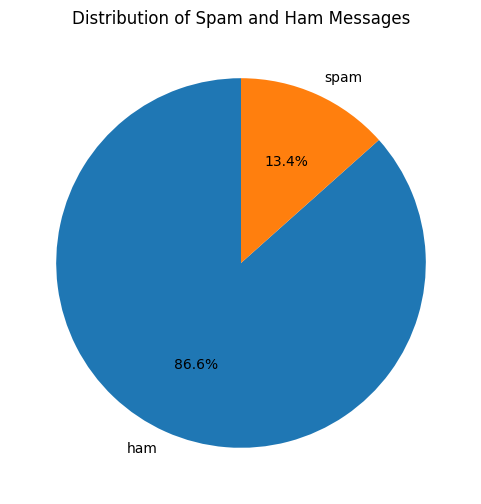

In [12]:
# Distribution of Spam and Ham Messages

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df'
category_counts = df['Category'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
_ = plt.title('Distribution of Spam and Ham Messages')


In [13]:
df.tail() #Tail show the last row of the data

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


from matplotlib import pyplot as plt
import seaborn as sns
_df_12.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_13.groupby('Message').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Message'].value_counts()
    for x_label, grp in _df_14.groupby('Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Category')
_ = plt.ylabel('Message')

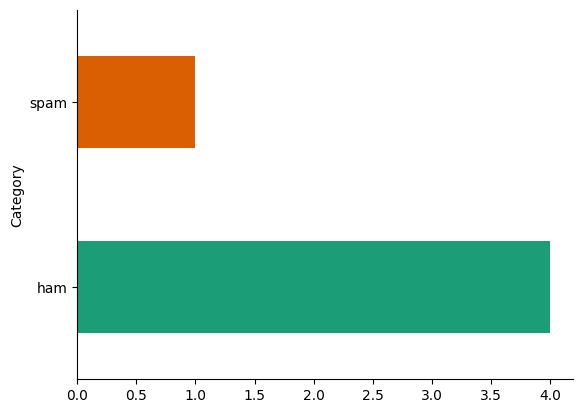

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_12.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
df.shape # Check Data Shape

(5572, 2)

In [24]:
df.isnull().sum() # Check Null Values


,0
Category,0
Message,0


In [30]:
new_var = df.duplicated().any()
new_var

True

In [34]:
new_var = df.drop_duplicates(inplace=True)
new_var

In [35]:
 df.duplicated().any()

False

**Text Visualization**

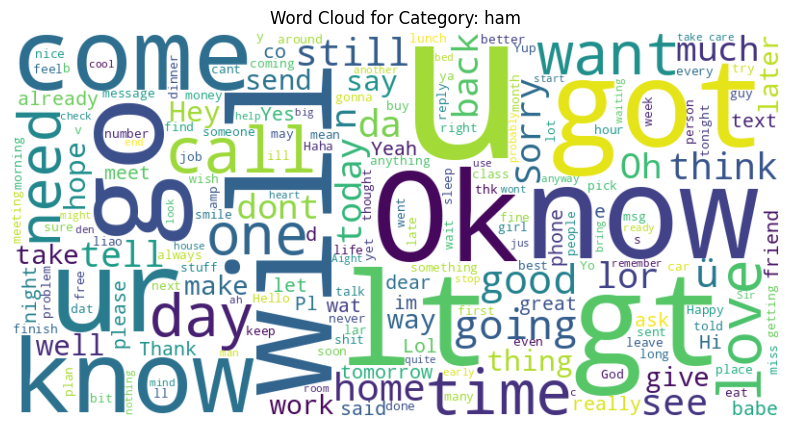

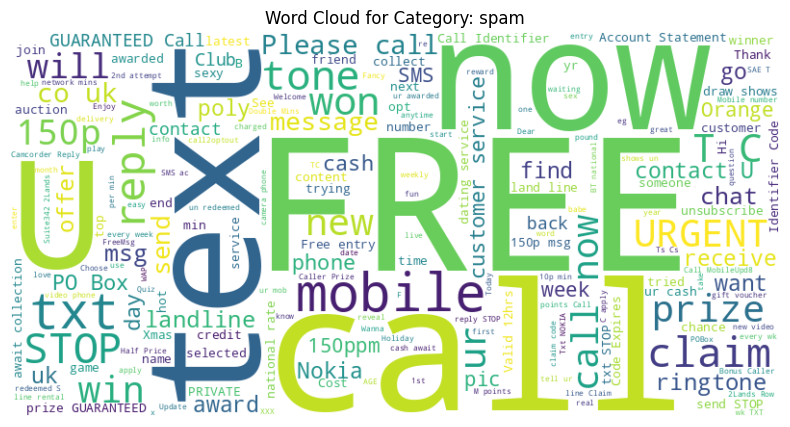

In [36]:
for category in df['Category'].unique():
    # Filter the DataFrame for the current category
    filtered_df = df[df['Category'] == category]

    # Concatenate all text data for the current category
    text = ' '.join(filtered_df['Message'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()

In [42]:
# Encode Category column
le = LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [72]:
# Convert 'Text' column to lowercase
df['Message'] = df['Message'].str.lower()
df.head()

,Category,Message,Message_stemmed
0,0,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni,ok lar joke wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkt st m...
3,0,u dun say early hor u c already say,u dun say earli hor u c alreadi say
4,0,nah dont think goes usf lives around though,nah dont think goe usf live around though


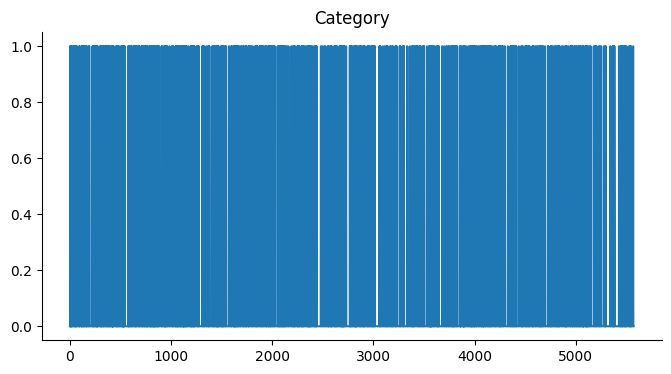

In [73]:
# @title Category

from matplotlib import pyplot as plt
df['Category'].plot(kind='line', figsize=(8, 4), title='Category')
plt.gca().spines[['top', 'right']].set_visible(False)

In [74]:
# Remove extra white spaces from the 'Text' column
df['Message'] = df['Message'].str.strip()
df.head()

,Category,Message,Message_stemmed
0,0,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni,ok lar joke wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkt st m...
3,0,u dun say early hor u c already say,u dun say earli hor u c alreadi say
4,0,nah dont think goes usf lives around though,nah dont think goe usf live around though


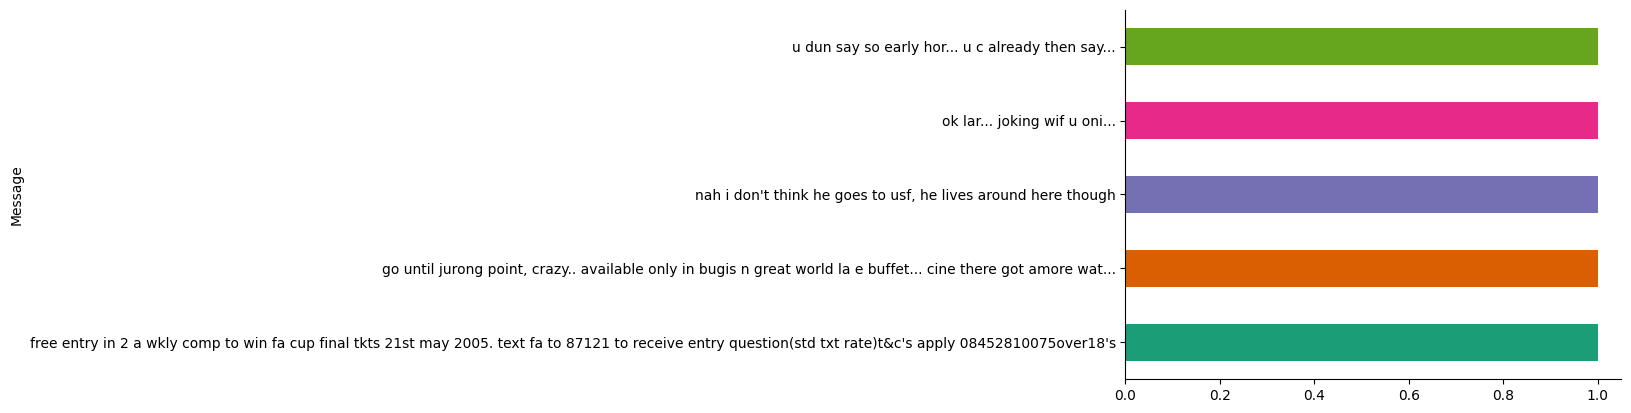

In [75]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_20.groupby('Message').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [45]:
# Function to remove HTML tags from text
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Remove HTML tags from 'Text' column
df['Message'] = df['Message'].apply(remove_html_tags)

In [76]:
df.head()

,Category,Message,Message_stemmed
0,0,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni,ok lar joke wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkt st m...
3,0,u dun say early hor u c already say,u dun say earli hor u c alreadi say
4,0,nah dont think goes usf lives around though,nah dont think goe usf live around though


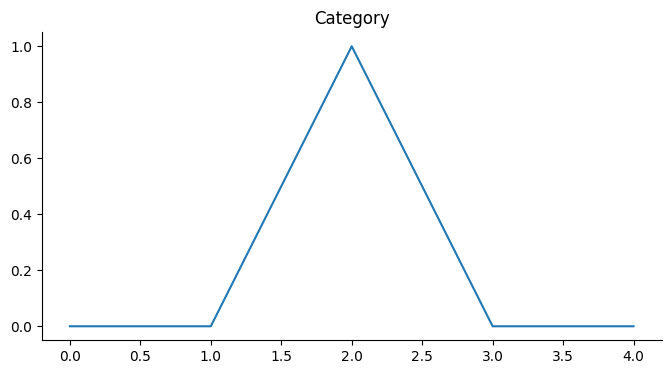

In [77]:
from matplotlib import pyplot as plt
_df_25['Category'].plot(kind='line', figsize=(8, 4), title='Category')
plt.gca().spines[['top', 'right']].set_visible(False)

In [78]:
# Define the punctuation characters to remove
punctuation = string.punctuation
# Function to remove punctuation from text
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation))

# Apply remove_punctuation function to 'Text' column
df['Message'] = df['Message'].apply(remove_punctuation)
df.head()

,Category,Message,Message_stemmed
0,0,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni,ok lar joke wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkt st m...
3,0,u dun say early hor u c already say,u dun say earli hor u c alreadi say
4,0,nah dont think goes usf lives around though,nah dont think goe usf live around though


In [50]:
# Define a function to remove URLs using regular expressions
def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)

# Apply the function to the 'Text' column
df['Message'] = df['Message'].apply(remove_urls)
df.head()

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


In [51]:
def remove_special_characters(text):
    # Define the pattern to match special characters
    pattern = r'[^a-zA-Z0-9\s]'  # Matches any character that is not alphanumeric or whitespace

    # Replace special characters with an empty string
    clean_text = re.sub(pattern, '', text)

    return clean_text

# Apply the function to the 'Message' column
df['Message'] = df['Message'].apply(remove_special_characters)

In [53]:
# Function to remove numeric values from text
def remove_numeric(text):
    return re.sub(r'\d+', '', text)

# Apply the function to the "Message" column
df['Message'] = df['Message'].apply(remove_numeric)
df.head()

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


In [54]:
# Define a function to remove non-alphanumeric characters
def remove_non_alphanumeric(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Apply the function to the "Message" column
df['Message'] = df['Message'].apply(remove_non_alphanumeric)

In [55]:
# Define a dictionary of chat word mappings
chat_words = {
   "AFAIK": "As Far As I Know",
"AFK": "Away From Keyboard",
"ASAP": "As Soon As Possible",
"ATK": "At The Keyboard",
"ATM": "At The Moment",
"A3": "Anytime, Anywhere, Anyplace",
"BAK": "Back At Keyboard",
"BBL": "Be Back Later",
"BBS": "Be Back Soon",
"BFN": "Bye For Now",
"B4N": "Bye For Now",
"BRB": "Be Right Back",
"BRT": "Be Right There",
"BTW": "By The Way",
"B4": "Before",
"B4N": "Bye For Now",
"CU": "See You",
"CUL8R": "See You Later",
"CYA": "See You",
"FAQ": "Frequently Asked Questions",
"FC": "Fingers Crossed",
"FWIW": "For What It's Worth",
"FYI": "For Your Information",
"GAL": "Get A Life",
"GTG": "Got To Go",
"GTR": "Got To Run",
"H8": "Hate",
"HBD": "Happy Birthday",
"HIFW": "How I Feel When",
"HML": "Hit Me Later",
"HNS": "Have Not Said",
"HRU": "How Are You",
"HTH": "Hope This Helps",
"IDK": "I Don't Know",
"IDC": "I Don't Care",
"IKR": "I Know Right",
"ILY": "I Love You",
"IMO": "In My Opinion",
"IMHO": "In My Humble Opinion",
"IRL": "In Real Life",
"JK": "Just Kidding",
"JIC": "Just In Case",
"JMO": "Just My Opinion",
"K": "Okay",
"KK": "Okay, Okay",
"L8R": "Later",
"LOL": "Laugh Out Loud",
"LQTM": "Laughing Quietly To Myself",
"LTNS": "Long Time No See",
"LMAO": "Laughing My Ass Off",
"LMFAO": "Laughing My Freaking Ass Off",
"LMK": "Let Me Know",
"LUV": "Love",
"MEH": "Indifference",
"MIA": "Missing In Action",
"NP": "No Problem",
"NVM": "Never Mind",
"OMG": "Oh My God",
"OMFG": "Oh My F***ing God",
"OT": "Off Topic",
"OTOH": "On The Other Hand",
"OTP": "One True Pairing",
"PC": "Personal Computer",
"PPL": "People",
"PLZ": "Please",
"PLMK": "Please Let Me Know",
"PM": "Private Message",
"PRT": "Part",
"PTL": "Praise The Lord",
"ROFL": "Rolling On The Floor Laughing",
"ROFLMAO": "Rolling On The Floor Laughing My Ass Off",
"RSVP": "Répondez S'il Vous Plaît",
"SMH": "Shaking My Head",
"SO": "Significant Other",
"SRSLY": "Seriously",
"STFU": "Shut The F*** Up",
"SWYP": "So What’s Your Point",
"TBA": "To Be Announced",
"TBC": "To Be Continued",
"TBD": "To Be Determined",
"TMI": "Too Much Information",
"TTYL": "Talk To You Later",
"TYT": "Take Your Time",
"UR": "Your",
"UR2": "You Are Too",
"VBR": "Very Busy Right Now",
"W8": "Wait",
"WBU": "What About You",
"WTF": "What The F***",
"WTH": "What The Hell",
"YOLO": "You Only Live Once",
"YMMV": "Your Mileage May Vary",
"ZZZ": "Sleep",
"2B": "To Be",
"2F4F": "Too Fat For Fame",
"2M2H": "Too Much To Handle",
"4EVA": "Forever",
"4Y": "For You",
"8D": "Eight-Dimensional",
"8P": "8 Parts",
"90s": "Nineties",
"AKA": "Also Known As",
"AD": "Anno Domini",
"AKA": "Also Known As",
"BAE": "Before Anyone Else",
"BFF": "Best Friends Forever",
"BFFL": "Best Friends For Life",
"BTAIM": "But Then Again I May",
"BYOB": "Bring Your Own Bottle",
"CBA": "Can't Be Arsed",
"CGU": "Can't Get Up",
"COB": "Close Of Business",
"CYA": "Cover Your Ass",
"DIY": "Do It Yourself",
"DYK": "Did You Know",
"EMT": "Emergency Medical Technician",
"F2F": "Face To Face",
"FOMO": "Fear Of Missing Out",
"FTW": "For The Win",
"GTFO": "Get The F*** Out",
"HAC": "High Altitude Condition",
"ICBW": "I Could Be Wrong",
"IIRC": "If I Remember Correctly",
"IM": "Instant Message",
"INB4": "In Before",
"IRL": "In Real Life",
"ISA": "I Say Again",
"ITB": "In The Bag",
"ITT": "In This Thread",
"JBG": "Just Be Gentle",
"KISS": "Keep It Simple, Stupid",
"LMAO": "Laughing My Ass Off",
"LOLZ": "Laugh Out Loud, Zombified",
"LTW": "Learn To Win",
"MEGA": "Massive",
"MP": "Maximum Power",
"NA": "Not Applicable",
"NB": "Note Bene",
"NC": "No Comment",
"NGL": "Not Gonna Lie",
"NOM": "Nominate",
"NPC": "Non-Playable Character",
"OOC": "Out Of Context",
"OMG": "Oh My God",
"ONA": "Of No Account",
"OP": "Original Post",
"OOTD": "Outfit Of The Day",
"OT": "Off Topic",
"PC": "Personal Computer",
"POV": "Point Of View",
"RIP": "Rest In Peace",
"RL": "Real Life",
"ROFL": "Rolling On The Floor Laughing",
"RSVP": "Répondez S'il Vous Plaît",
"SAL": "Stay At Home",
"SOS": "Save Our Souls",
"TBA": "To Be Announced",
"TBC": "To Be Continued",
"TBD": "To Be Determined",
"TGIF": "Thank God It’s Friday",
"TMI": "Too Much Information",
"TLDR": "Too Long, Didn't Read",
"TYT": "Take Your Time",
"UBER": "Uberrima Fides",
"UOK": "You Okay",
"VVIP": "Very Very Important Person",
"WFH": "Work From Home",
"WTF": "What The F***",
"YOLO": "You Only Live Once",
"YMMV": "Your Mileage May Vary",
"ZOMG": "Zomg, Oh My God",
"ZZZ": "Sleep",
"2B": "To Be",
"2F4F": "Too Fat For Fame",
"2M2H": "Too Much To Handle",
"4EVA": "Forever",
"4Y": "For You",
"8D": "Eight-Dimensional",
"8P": "8 Parts"
}

In [56]:
# Function to replace chat words with their full forms
def replace_chat_words(text):
    words = text.split()
    for i, word in enumerate(words):
        if word.lower() in chat_words:
            words[i] = chat_words[word.lower()]
    return ' '.join(words)

# Apply replace_chat_words function to 'Text' column
df['Message'] = df['Message'].apply(replace_chat_words)

In [57]:
# Download NLTK stopwords corpus
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords function to 'Text' column
df['Message'] = df['Message'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [58]:
# Function to remove emojis from text
def remove_emojis(text):
    return emoji.demojize(text)

# Apply remove_emojis function to 'Text' column
df['Message'] = df['Message'].apply(remove_emojis)

In [59]:
# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Apply stemming
df['Message_stemmed'] = df['Message'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))


In [60]:
# Intlize CountVectorizer
cv = CountVectorizer()

# Fitting CountVectorizer on X
X = cv.fit_transform(df['Message_stemmed']).toarray()
y = df['Category']

In [61]:
# Train Test Split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [63]:
# Logistic Regression with tuned parameters
lr_model = LogisticRegression(C=0.1, solver='liblinear', max_iter=500)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Multinomial Naive Bayes with tuned parameters
mnb_model = MultinomialNB(alpha=0.1)
mnb_model.fit(X_train, y_train)
mnb_pred = mnb_model.predict(X_test)

# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_pred = gnb_model.predict(X_test)

# Support Vector Machines (SVM) with tuned parameters
svm_model = SVC(C=10.0, kernel='rbf', gamma='auto')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Decision Trees with tuned parameters
dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Random Forests with tuned parameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=10)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Gradient Boosting Classifier with tuned parameters
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=5)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# XGBoost Classifier with tuned parameters
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [64]:
# Calculate accuracy, precision and recall for each model
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, average='weighted')
lr_recall = recall_score(y_test, lr_pred, average='weighted')
lr_conf_matrix = confusion_matrix(y_test, lr_pred)

mnb_accuracy = accuracy_score(y_test, mnb_pred)
mnb_precision = precision_score(y_test, mnb_pred, average='weighted')
mnb_recall = recall_score(y_test, mnb_pred, average='weighted')
mnb_conf_matrix = confusion_matrix(y_test, mnb_pred)

gnb_accuracy = accuracy_score(y_test, gnb_pred)
gnb_precision = precision_score(y_test, gnb_pred, average='weighted')
gnb_recall = recall_score(y_test, gnb_pred, average='weighted')
gnb_conf_matrix = confusion_matrix(y_test, gnb_pred)

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
svm_conf_matrix = confusion_matrix(y_test, svm_pred)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_conf_matrix = confusion_matrix(y_test, dt_pred)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
gb_conf_matrix = confusion_matrix(y_test, gb_pred)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')
xgb_conf_matrix = confusion_matrix(y_test, xgb_pred)

In [65]:
# Print precision, recall, and accuracy for each model
print("Logistic Regression:")
print(f"The accuracy score of Logistic Regression is {lr_accuracy}, The Precision Score is {lr_precision},The Recall Score is {lr_recall}")
print(f"The Confusion matrix is \n{lr_conf_matrix}")
print("\n")

print("Multinomial Naive Bayes:")
print(f"The accuracy score of MultinomialNB is {mnb_accuracy}, The Precision Score is {mnb_precision},The Recall Score is {mnb_recall}")
print(f"The Confusion matrix is \n{mnb_conf_matrix}")
print("\n")

print("Gaussian Naive Bayes:")
print(f"The accuracy score of GaussianNB is {gnb_accuracy}, The Precision Score is {gnb_precision},The Recall Score is {gnb_recall}")
print(f"The Confusion matrix is \n{gnb_conf_matrix}")
print("\n")

print("SVM:")
print(f"The accuracy score of SVC is {svm_accuracy}, The Precision Score is {svm_precision},The Recall Score is {svm_recall}")
print(f"The Confusion matrix is \n{svm_conf_matrix}")
print("\n")

print("Decision Trees:")
print(f"The accuracy score of Decision Tree classifier is {dt_accuracy}, The Precision Score is {dt_precision},The Recall Score is {dt_recall}")
print(f"The Confusion matrix is \n{dt_conf_matrix}")
print("\n")

print("Random Forests:")
print(f"The accuracy score of Random Forest classifier is {rf_accuracy}, The Precision Score is {rf_precision},The Recall Score is {rf_recall}")
print(f"The Confusion matrix is \n{rf_conf_matrix}")
print("\n")

print("Gradient Boosting Classifier:")
print(f"The accuracy score of Gradient Boosting Classifier is {gb_accuracy}, The Precision Score is {gb_precision},The Recall Score is {gb_recall}")
print(f"The Confusion matrix is \n{gb_conf_matrix}")
print("\n")

print("XGBoost Classifier:")
print(f"The accuracy score of XGBoost Classifier is {xgb_accuracy}, The Precision Score is {xgb_precision},The Recall Score is {xgb_recall}")
print(f"The Confusion matrix is \n{xgb_conf_matrix}")
print("\n")

print(f"Logistic Regression is doing really well with an accuracy of {lr_accuracy} and precision of {lr_precision}, showing that it's the top performer in our email spam detection task.")

Logistic Regression:
The accuracy score of Logistic Regression is 0.9718992248062015, The Precision Score is 0.9724528699938659,The Recall Score is 0.9718992248062015
The Confusion matrix is 
[[895   1]
 [ 28 108]]


Multinomial Naive Bayes:
The accuracy score of MultinomialNB is 0.9563953488372093, The Precision Score is 0.9624374427464473,The Recall Score is 0.9563953488372093
The Confusion matrix is 
[[859  37]
 [  8 128]]


Gaussian Naive Bayes:
The accuracy score of GaussianNB is 0.8691860465116279, The Precision Score is 0.9179176426684793,The Recall Score is 0.8691860465116279
The Confusion matrix is 
[[776 120]
 [ 15 121]]


SVM:
The accuracy score of SVC is 0.8953488372093024, The Precision Score is 0.9066061336051144,The Recall Score is 0.8953488372093024
The Confusion matrix is 
[[896   0]
 [108  28]]


Decision Trees:
The accuracy score of Decision Tree classifier is 0.9534883720930233, The Precision Score is 0.9518687645108085,The Recall Score is 0.9534883720930233
The Con

In [66]:
# Create a dictionary with evaluation results
evaluation_data = {
    'Model': ['Logistic Regression', 'MultinomialNB', 'GaussianNB', 'Decision Tree', 'SVM', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'Accuracy': [lr_accuracy, mnb_accuracy, gnb_accuracy, dt_accuracy, svm_accuracy, rf_accuracy, gb_accuracy, xgb_accuracy],
    'Precision': [lr_precision, mnb_precision, gnb_precision, dt_precision, svm_precision, rf_precision, gb_precision, xgb_precision],
   }

# Create a DataFrame
evaluation_df = pd.DataFrame(evaluation_data)

# Sort the DataFrame based on Accuracy and Precision columns in descending order
evaluation_df = evaluation_df.sort_values(by=['Accuracy', 'Precision'], ascending=False)

# Display the sorted DataFrame
print(evaluation_df)

                 Model  Accuracy  Precision
0  Logistic Regression  0.971899   0.972453
7              XGBoost  0.965116   0.964372
6    Gradient Boosting  0.962209   0.961283
1        MultinomialNB  0.956395   0.962437
3        Decision Tree  0.953488   0.951869
5        Random Forest  0.915698   0.923159
4                  SVM  0.895349   0.906606
2           GaussianNB  0.869186   0.917918


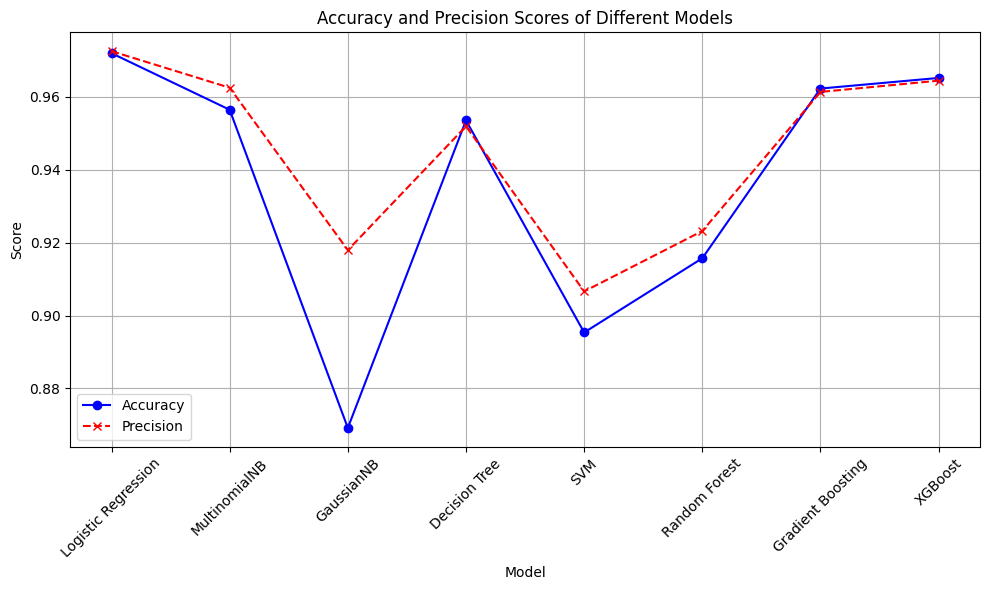

In [67]:
# Define the models and their corresponding accuracy and precision scores
Models = ['Logistic Regression', 'MultinomialNB', 'GaussianNB', 'Decision Tree', 'SVM', 'Random Forest', 'Gradient Boosting', 'XGBoost']
Accuracy = [lr_accuracy, mnb_accuracy, gnb_accuracy, dt_accuracy, svm_accuracy, rf_accuracy, gb_accuracy, xgb_accuracy]
Precision = [lr_precision, mnb_precision, gnb_precision, dt_precision, svm_precision, rf_precision, gb_precision, xgb_precision]

# Plotting
plt.figure(figsize=(10, 6))

# Plot accuracy scores
plt.plot(Models, Accuracy, marker='o', linestyle='-', color='b', label='Accuracy')

# Plot precision scores
plt.plot(Models, Precision, marker='x', linestyle='--', color='r', label='Precision')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Accuracy and Precision Scores of Different Models')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()